### Task description:
We have already known that two bedroom properties are the most profitable on short-term rentals in New York City. To further investigate which areas (zip codes) are the best to invest in, we use AirBnB and Zillow data as the references for Revenue and Cost, respectively. Below are some introductions about AirBnB and Zillow.

In [2]:
import pandas as pd
import numpy as np
import io
import requests

# Loading the data.
year, month, day = 2017, 5, 2

if month < 10: month = '0' + str(month)  ## month = month.zfill(2)
else: month = str(month)
if day < 10: day = '0' + str(day)
else: day = str(day)
    
url = "http://data.insideairbnb.com/united-states/ny/new-york-city/%d-%s-%s/data/listings.csv.gz" % (year, month, day)
Airbnb = pd.read_csv(url, low_memory=False)  # load airbnb data here

Zillow = pd.read_csv("Zip_Zhvi_2bedroom.csv")

In [3]:
Airbnb.describe()

,id,scrape_id,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,4.075300e+04,4.075300e+04,4.075300e+04,0.0,40502.000000,40502.000000,40753.000000,40753.000000,40753.000000,40594.000000,...,30829.000000,30736.000000,30768.000000,30717.000000,30767.000000,30716.000000,30714.000000,0.0,40753.000000,31454.000000
mean,9.912016e+06,2.017050e+13,3.059031e+07,NaN,2.220755,2.220755,40.730776,-73.955952,2.789120,1.125758,...,93.004379,9.531624,9.196080,9.709184,9.738259,9.417991,9.338282,NaN,1.662675,1.312114
std,5.582254e+06,1.529316e+01,3.267980e+07,NaN,15.840520,15.840520,0.053690,0.041214,1.821218,0.388174,...,8.584762,0.842565,1.118605,0.697351,0.675564,0.836230,0.896188,NaN,2.159644,1.757380
min,2.515000e+03,2.017050e+13,7.200000e+01,NaN,0.000000,0.000000,40.499794,-74.240843,1.000000,0.000000,...,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.010000
25%,4.995083e+06,2.017050e+13,4.857042e+06,NaN,1.000000,1.000000,40.692356,-73.983946,2.000000,1.000000,...,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.250000
50%,1.001931e+07,2.017050e+13,1.805129e+07,NaN,1.000000,1.000000,40.724119,-73.957210,2.000000,1.000000,...,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,0.750000
75%,1.496799e+07,2.017050e+13,4.664988e+07,NaN,2.000000,2.000000,40.764489,-73.940474,4.000000,1.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,1.910000
max,1.851999e+07,2.017050e+13,1.284849e+08,NaN,855.000000,855.000000,40.912164,-73.711750,16.000000,8.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,35.000000,125.920000


In [4]:
Airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7949480,https://www.airbnb.com/rooms/7949480,20170502132028,2017-05-03,City Island Sanctuary relaxing BR & Bath w Par...,Come relax on City Island in our quiet guest r...,"On parle français et anglais, (lire Français c...",Come relax on City Island in our quiet guest r...,none,City Island is a unique sanctuary in New York ...,...,10.0,f,NaN,NaN,f,moderate,t,t,1,1.59
1,16042478,https://www.airbnb.com/rooms/16042478,20170502132028,2017-05-04,WATERFRONT STUDIO APARTMENT,My place is close to Sea Shore. You’ll love my...,(URL HIDDEN),My place is close to Sea Shore. You’ll love my...,none,(URL HIDDEN),...,NaN,f,NaN,NaN,t,flexible,f,f,1,NaN
2,1886820,https://www.airbnb.com/rooms/1886820,20170502132028,2017-05-04,Quaint City Island Community.,Quiet island boating town on Long Island Soun...,"Master bed with queen bed, full bath and offi...",Quiet island boating town on Long Island Soun...,none,Small New England type town in the middle of ...,...,NaN,f,NaN,NaN,f,strict,f,f,1,NaN
3,6627449,https://www.airbnb.com/rooms/6627449,20170502132028,2017-05-05,Large 1 BDRM in Great location,This ground floor apartment is light and airy ...,"We are close to fishing, boating, biking, hors...",This ground floor apartment is light and airy ...,none,City Island is a unique and a hidden gem of Ne...,...,10.0,f,NaN,NaN,f,strict,f,f,1,0.54
4,5557381,https://www.airbnb.com/rooms/5557381,20170502132028,2017-05-04,Quaint City Island Home,"Located in an old sea-shanty town, our home ha...",You won't find a place so close to the city (N...,"Located in an old sea-shanty town, our home ha...",none,"City Island is unique in two ways. First, you ...",...,10.0,f,NaN,NaN,t,moderate,f,f,1,3.63


In [5]:
Zillow.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
count,8946.000000,8946.000000,8946.000000,6284.000000,6364.000000,6364.000000,6369.000000,6370.000000,6370.000000,6370.000000,...,8.946000e+03,8.946000e+03,8.946000e+03,8.943000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03
mean,80671.285938,47494.449027,4473.500000,93754.057925,93616.043369,93642.630421,93609.734652,93646.357928,93722.339089,93849.262166,...,2.057233e+05,2.071612e+05,2.086479e+05,2.099822e+05,2.110339e+05,2.121189e+05,2.132461e+05,2.143624e+05,2.155610e+05,2.165161e+05
std,31636.286116,30868.419487,2582.632088,44385.146499,44222.734487,44225.112290,44264.266105,44340.199368,44457.610118,44605.248316,...,1.952097e+05,1.960432e+05,1.970957e+05,1.981392e+05,1.988496e+05,1.995264e+05,2.004473e+05,2.017663e+05,2.031817e+05,2.041795e+05
min,58196.000000,1001.000000,1.000000,22400.000000,23500.000000,24500.000000,25400.000000,26200.000000,26700.000000,27200.000000,...,2.890000e+04,2.880000e+04,2.820000e+04,2.810000e+04,2.830000e+04,2.810000e+04,2.830000e+04,2.870000e+04,2.830000e+04,2.800000e+04
25%,66819.250000,21125.500000,2237.250000,64100.000000,64000.000000,64000.000000,64000.000000,63900.000000,63900.000000,64000.000000,...,9.870000e+04,9.942500e+04,9.992500e+04,1.007500e+05,1.014000e+05,1.023000e+05,1.029000e+05,1.036250e+05,1.046000e+05,1.053000e+05
50%,77191.500000,44404.000000,4473.500000,84500.000000,84500.000000,84600.000000,84600.000000,84700.000000,84700.000000,84850.000000,...,1.492000e+05,1.503000e+05,1.514500e+05,1.525000e+05,1.533000e+05,1.542000e+05,1.549000e+05,1.556000e+05,1.565000e+05,1.571000e+05
75%,92251.250000,77357.750000,6709.750000,111000.000000,110800.000000,111000.000000,110900.000000,110900.000000,110975.000000,111100.000000,...,2.352500e+05,2.373000e+05,2.390000e+05,2.407000e+05,2.422750e+05,2.435000e+05,2.450000e+05,2.460750e+05,2.474000e+05,2.486750e+05
max,738092.000000,99901.000000,8946.000000,420700.000000,422300.000000,430400.000000,440400.000000,447100.000000,453000.000000,454300.000000,...,3.347100e+06,3.305500e+06,3.261100e+06,3.244000e+06,3.231400e+06,3.183300e+06,3.160200e+06,3.193500e+06,3.262200e+06,3.316500e+06


In [6]:
Zillow.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,...,368600,370200,372300,375300.0,378700,381400,381800,382100,383300,385100
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
3,84616,60614,Chicago,IL,Chicago,Cook,4,195800.0,193500.0,192600.0,...,398900,401200,403200,405700.0,408300,408800,408000,410100,412200,412200
4,93144,79936,El Paso,TX,El Paso,El Paso,5,59100.0,60500.0,60900.0,...,82400,82300,82400,82300.0,82500,83200,83900,84100,83900,83700



for zipcode 60657 (regionname in zillow data), plot the two -bedroom median price as function of time to show the price trend for this zipcode. save the figure as price_60657.png

Text(0.5, 1.0, 'Price Trend for Zipcode at 60657')

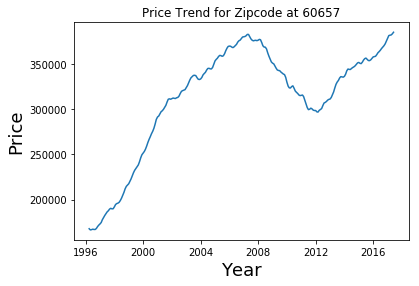

In [8]:
from datetime import datetime
import matplotlib.pyplot as plt
zipcode = 60657
df = Zillow.loc[Zillow.RegionName == zipcode, '1996-04':].T.reset_index()
df['month'] = df['index'].apply(lambda x: datetime.strptime(x, '%Y-%m'))
df.columns = ['index', 'price',"month"]
#Add your code here
#Plot the Price Trends for Zipcode at 60657
plt.plot(df['month'], df['price'])
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.title('Price Trend for Zipcode at %s'%zipcode)

find the mean and median two bedroom airbnb price in New York city by room type (private room vs whole house). Make a barchart to show the comparison. Save the figure. 

In [9]:
airbnb_copy = Airbnb.copy()
NYC_2br_df = airbnb_copy[airbnb_copy['bedrooms'] == 2] #extract two-bedroom data

In [10]:
NYC_2br_df.price.sample(5)

28788    $200.00
31607    $173.00
35916    $225.00
31474    $480.00
37622    $210.00
Name: price, dtype: object

In [11]:
NYC_2br_df.price = NYC_2br_df.price.apply(lambda x: float(x[1:].replace(",", "")))

C:\Users\TECH_LAB\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [12]:
import numpy as np
#type your code here
temp = NYC_2br_df.groupby('room_type')['price'].agg([np.mean, np.median])
temp

,mean,median
room_type,,
Entire home/apt,239.881123,195.0
Private room,112.245847,90.0


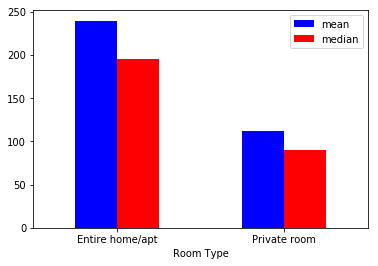

In [13]:
# type your code here: plot a barchart
temp.plot(kind = 'bar', rot=0, color = ['b', 'r'])
plt.xlabel('Room Type')
plt.legend()
plt.savefig('NYC_2brComparison.png')
plt.show()
del temp

 
calculate the mean and median airbnb listing price by zipcode. Assumea 75% occupancy rate. calculate  the return on investments.  
ROI = annual_rental_income / house_price

In [14]:
df1 = Airbnb.copy()
#
df1['price'] = df1.price.str.replace('[\$,]', '', regex=True).astype(float)

In [15]:
df1.price.head()

0     99.0
1    200.0
2    300.0
3    125.0
4     69.0
Name: price, dtype: float64

In [16]:
df1.shape

(40753, 95)

In [17]:
# Check the valid records
df1.price.notnull().sum()

40753

In [18]:
# Check the NaN values
df1.zipcode.isnull().sum()

611

In [19]:
# Drop off all NaN values
df1 = df1.dropna(subset=['zipcode'])

In [20]:
df1.shape

(40142, 95)

In [21]:
df1['ZipC_len']=df1.zipcode.str.len()

In [22]:
df1[['ZipC_len','zipcode']].sample(10)

,ZipC_len,zipcode
37347,5,11211
17899,5,11222
33032,5,10065
26540,5,10019
18205,5,11222
16089,5,11218
14597,5,10009
37133,5,11249
29940,5,10012
23372,5,11423


In [23]:
df1.ZipC_len.value_counts()

5     40135
10        5
11        1
2         1
Name: ZipC_len, dtype: int64

In [24]:
## Delete some data which can not be repaired.
df1[df1.ZipC_len==2].zipcode

34844    1m
Name: zipcode, dtype: object

In [25]:
df1[df1.ZipC_len==10].zipcode #repairable data, just extract the first 5 as zipcode
df1[df1.ZipC_len==11].zipcode
df1 = df1[df1.ZipC_len != 2]
df1.shape
df1.zipcode = df1.zipcode.str[0:5]
df1[df1.ZipC_len==10].zipcode # repaired
df1[df1.ZipC_len==11].zipcode #repaired

38708    11249
Name: zipcode, dtype: object

In [26]:
abnb_df = df1.groupby('zipcode')['price'].agg([np.mean,np.median])

In [27]:
abnb_df.sample(4)

,mean,median
zipcode,,
11001,106.666667,115.0
10011,225.601885,195.0
10078,90.000000,90.0
10029,130.267425,99.0


In [28]:
abnb_df = abnb_df.reset_index()
abnb_df.zipcode.sample(5)

187    11434
90     10472
20     10021
12     10011
192    11691
Name: zipcode, dtype: object

In [29]:
# Calculate about the rental income per year based on 0.75 occupancy rate.
Occu_Rate=0.75
abnb_df['Rental_Inc']=abnb_df['median']*365*Occu_Rate

In [30]:
# Check about the data type
abnb_df['zipcode'] = abnb_df.astype('int')

In [31]:
abnb_df.dtypes

zipcode         int32
mean          float64
median        float64
Rental_Inc    float64
dtype: object

In [32]:
zillow_copy = Zillow.copy()
zillow_df = zillow_copy[zillow_copy.City == 'New York'][['RegionName', '2017-06']]

In [33]:
zillow_df.columns = ['zipcode','Property_Value']

In [34]:
zillow_df.zipcode.sample()

667    10306
Name: zipcode, dtype: int64

In [35]:
# Merge the data inorder to get the new data frame about ROI
A_Z_df = pd.merge(abnb_df, zillow_df,on='zipcode')

In [36]:
#Check the datashape
A_Z_df.shape, abnb_df.shape, zillow_df.shape

((24, 5), (197, 4), (25, 2))

In [37]:
# Calculate about The ROI with the known function
A_Z_df['ROI*100'] = (A_Z_df.Rental_Inc/A_Z_df.Property_Value*100).apply(lambda x: round(x, 2))

In [38]:
A_Z_df = A_Z_df.sort_values(by = 'ROI*100', ascending = False)

In [39]:
# Top 5 zip codes which deserved to invest in NYC based on the data sets we have.
A_Z_df.head(5)

,zipcode,mean,median,Rental_Inc,Property_Value,ROI*100
11,10303,113.454545,90.0,24637.500,327700,7.52
13,10305,150.382353,99.5,27238.125,425100,6.41
12,10304,80.081081,70.0,19162.500,328300,5.84
14,10306,79.941176,75.0,20531.250,352900,5.82
17,10314,109.142857,74.5,20394.375,357300,5.71
